## Share Generation

In [7]:
N= 100
PRIME = 340282366920938463463374607431768211507  # This is 2^128 - 159, and is prime


In [8]:
import random

def generate_shares(username_key, t, n, prime=PRIME):
     
     username, key = list(username_key.items())[0]

     # Generate random polynomial coefficients
     coeffs = [key] + [random.randint(0, prime - 1) for _ in range(t - 1)]

     def f(x):
          return sum(c * pow(x, i, prime) for i, c in enumerate(coeffs)) % prime

     shares = [{username: (i, f(i))} for i in range(1, n + 1)]
     return shares


## Reconstruction

In [9]:
def reconstruct_secret(shares, threshold, prime=PRIME):
    points = [list(s.values())[0] for s in shares[:threshold]]  # Get (x, y) tuples

    def lagrange(x, x_s, y_s):
        total = 0
        for i in range(len(x_s)):
            xi, yi = x_s[i], y_s[i]
            prod = 1
            for j in range(len(x_s)):
                if i != j:
                    xj = x_s[j]
                    prod *= (x - xj) * pow(xi - xj, -1, prime)
                    prod %= prime
            total += yi * prod
            total %= prime
        return total

    x_s, y_s = zip(*points)
    return lagrange(0, x_s, y_s)


## Generating and Reconstructing Keys for different values of T and measeuring and storing the time for each cycle

In [10]:
user_dict = {"Pushan":2889992661}
threshold_latency = []

In [11]:
import time
for t_value in range(1,N+1):
     all_shares = generate_shares(user_dict, t_value, N)
     
     start = time.perf_counter()
     key = reconstruct_secret(all_shares, t_value)
     end = time.perf_counter()
     
     latency_ms = (end - start) * 1000

     threshold_latency.append((t_value, latency_ms))

print(threshold_latency)

[(1, 0.013300000318849925), (2, 0.02100000028804061), (3, 0.034700000014709076), (4, 0.048800000058690784), (5, 0.06790000043110922), (6, 0.08519999983036541), (7, 0.12749999996231054), (8, 0.16340000001946464), (9, 0.11730000005627517), (10, 0.4807000000255357), (11, 0.2767999999377935), (12, 0.35979999984192546), (13, 0.27980000004390604), (14, 0.5593999999291555), (15, 0.37639999982275185), (16, 0.3895999998348998), (17, 0.7232999996631406), (18, 0.6844999998065759), (19, 0.578000000132306), (20, 0.6254999998418498), (21, 0.6827000001976558), (22, 0.7455999998455809), (23, 0.8029000000533415), (24, 1.1383999999452499), (25, 1.1250000002291927), (26, 1.2104000002182147), (27, 1.2217000003147405), (28, 1.218700000208628), (29, 1.3564000000769738), (30, 1.4741999998477695), (31, 1.5604000000166707), (32, 1.6580000001340522), (33, 2.1799000001010427), (34, 2.755299999989802), (35, 2.435899999909452), (36, 2.755699999852368), (37, 4.258100000242848), (38, 3.98670000004131), (39, 3.010399

## Plotting

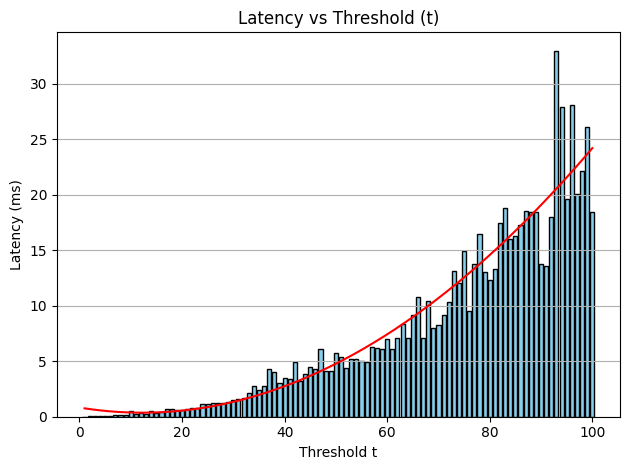

In [12]:
import matplotlib.pyplot as plt
import numpy as np

ts = [t for t, _ in threshold_latency]
latencies = [lat for _, lat in threshold_latency]

plt.bar(ts, latencies, color='skyblue', edgecolor='black')
plt.title("Latency vs Threshold (t)")
plt.xlabel("Threshold t")
plt.ylabel("Latency (ms)")
plt.grid(axis='y')
plt.tight_layout()

z = np.polyfit(ts, latencies, deg=2)
p = np.poly1d(z)
smooth_x = np.linspace(min(ts), max(ts), 300)
plt.plot(smooth_x, p(smooth_x), color='red', label='Fitted curve (deg=2)')

plt.show()
